# Exercise 3b: Masking

## Aim: Learn to mask data in xarray

Find the teaching material here: https://tutorial.xarray.dev/intermediate/indexing/boolean-masking-indexing.html

### Issues covered: 
- Create re-usable masks for data
- Plot masked data

Q1. For masking, we're back to using our ocean dataset. Load it now from `../data/vbhubo.pgc0apr.nc`.

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy as ccrs

ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temp = ds['temp']

Q2. Determine which grid cells sea surface temperaturevis more than the mean.

13.958738327026367


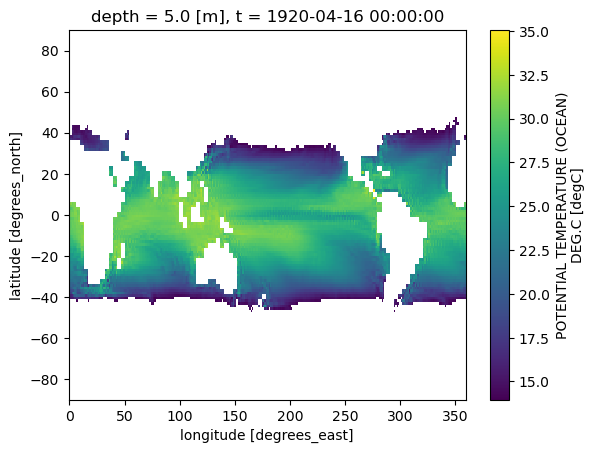

In [23]:
SST = temp.sel(depth = 0, method = 'nearest')

# Select the sea surface temperature (SST) at depth = 0
SST = temp.sel(depth=0, method='nearest')

# Calculate the mean SST
mean_SST = SST.mean().item()
print(mean_SST)

# Create a mask for SST values greater than the mean
temp_mask = SST > mean_SST
#temp_mask.plot()

# Apply the mask to the SST data to return only those values
temp_SST_above_mean = SST.where(temp_mask)

temp_SST_above_mean.plot()

Q3. Combine this with another .where() lookup to show only cells where the temperature is more than the mean and salinity is more than the mean.

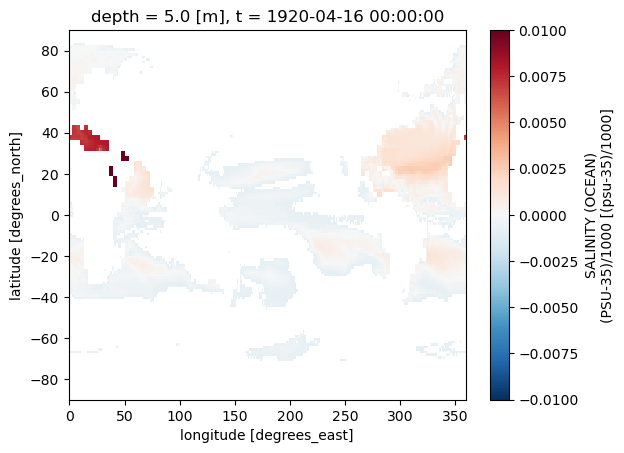

In [33]:
#Extract Salinity data
salinity = ds['salinity']
#print(salinity)

#extract surface salinity
salinity_surface = salinity.sel(depth=0, method='nearest')

# Calculate the mean Salinity
mean_salinity = salinity.mean().item()
#print(mean_salinity)

# Create a mask for salinity values above the mean
salinity_mask = salinity_surface > mean_salinity
#temp_mask.plot()

# Apply the mask to the SST data to return only those values
salinity_surface_above_mean = salinity_surface.where(salinity_mask)

salinity_surface_above_mean.plot()


Q4. Masks are just boolean arrays. Create a re-usuable mask for the temperature and sst criteia above, and a combined one.

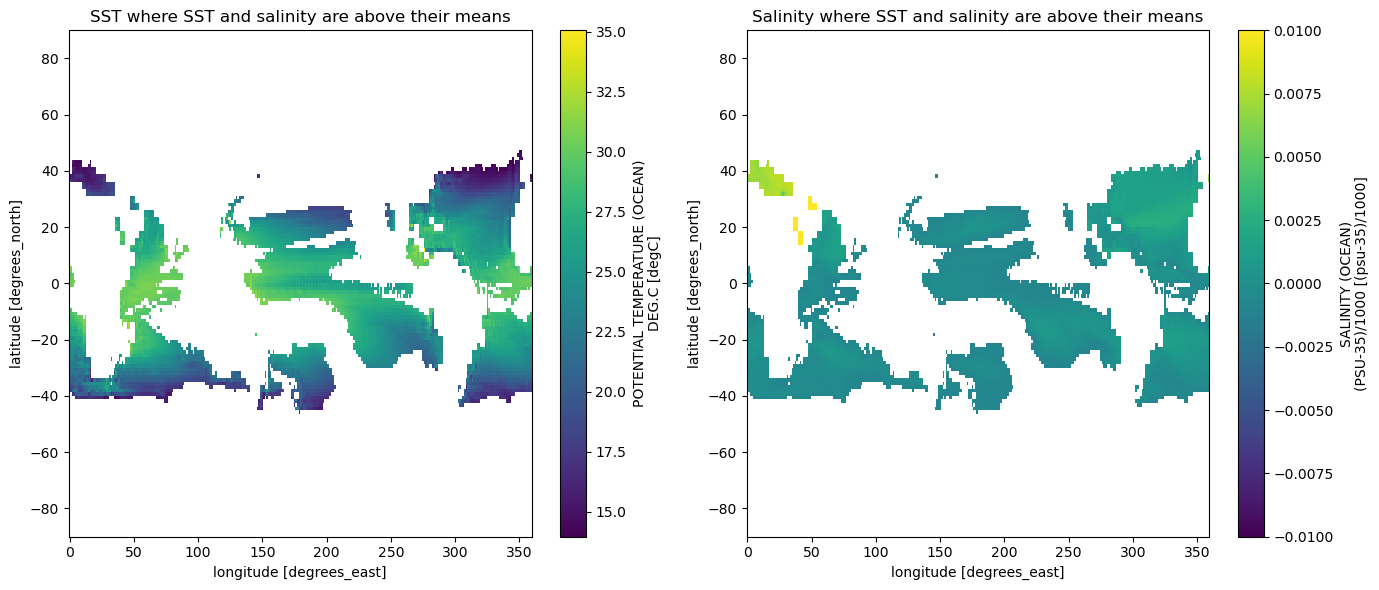

In [50]:
#now we create a combined mask
combined_mask = salinity_mask & temp_mask
#print(combined_mask)
combined = salinity_surface.where(combined_mask)
#combined.plot()

# Create a dataset with both variables
combined_dataset = xr.Dataset({
    'SST_above_mean': SST.where(combined_mask),
    'Salinity_above_mean': salinity_surface.where(combined_mask)
})

# Plot the area where both SST and salinity are above the mean on separate plots
plt.figure(figsize=(14, 6))

# Plot SST above mean
plt.subplot(1, 2, 1)
combined_dataset['SST_above_mean'].plot()
plt.title('SST where SST and salinity are above their means')

# Plot Salinity above mean
plt.subplot(1, 2, 2)
combined_dataset['Salinity_above_mean'].plot(cmap='viridis')
plt.title('Salinity where SST and salinity are above their means')

plt.tight_layout()
plt.show()


Q5. Use this mask to make the same temperature plot, and a similar one for sst.